## Arctic Heat

**AXCTD and XBT Profiles - all QC'd**

Purpose: plot cleaned XBT and AXCTD files 

Removed files with no data, truncated files to have only data once water was hit.  Bottom depth is estimated by nearest point to the ARDEMv2 Bathymetry Grid.   
[ArdemV2_Depth_Finder.ipynb](ArdemV2_Depth_Finder.ipynb).

In [65]:
import pandas as pd
import os
import datetime
import numpy as np

In [26]:
source_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'clean.dta' in f]


### Data Ingestion and data summary/statistics

A few lines to list and read the .iwg files into a dictionary of pandas dataframes.

The original .dta files have header as follows:   

```
Probe Type = AXBT     
       Date = 2018/05/26
       Time = 00:29:35.620
 
    Time     Depth    Frequency    (C)       (F) 
```

In [27]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)    

/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00004.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00000.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00001.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00009.clean.dta


## XBT

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

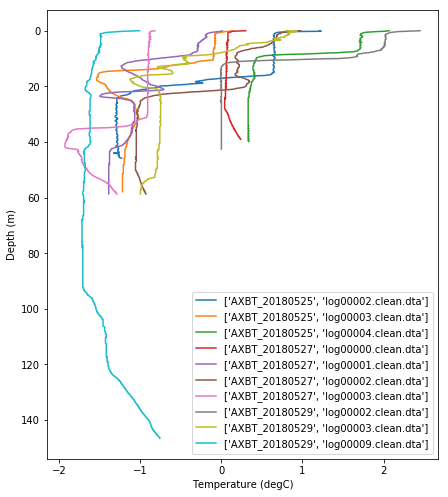

In [59]:
fig, ax = plt.subplots(figsize=(7,8.25))
for ds, df in dfs.items():
    try:
        ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-2:])

    except:
        pass

plt.ylabel('Depth (m)')
plt.xlabel('Temperature (degC)')    
ax.invert_yaxis()
plt.legend(loc='best')

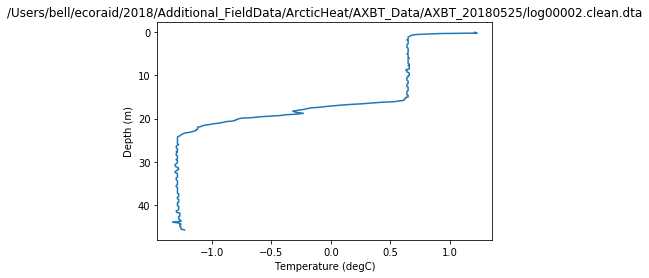

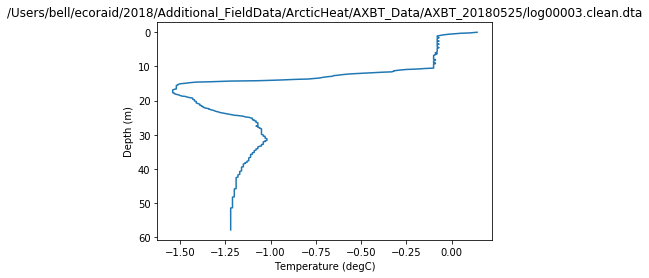

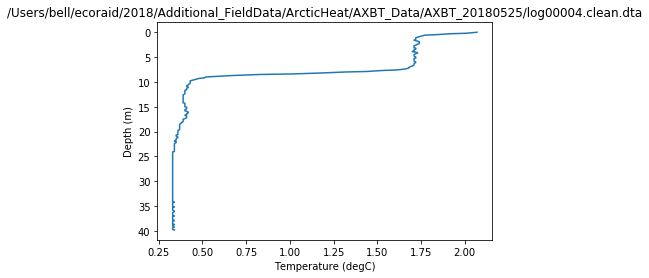

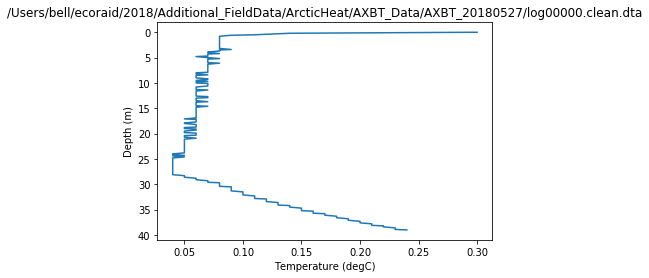

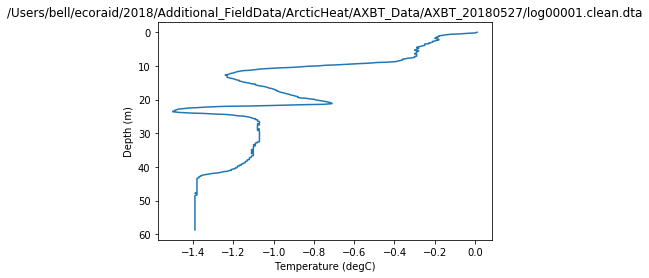

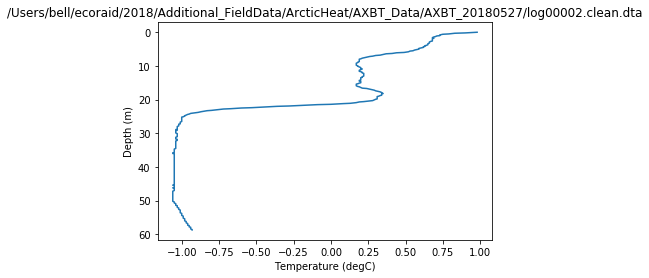

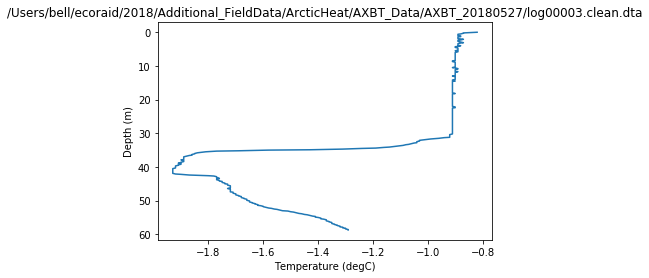

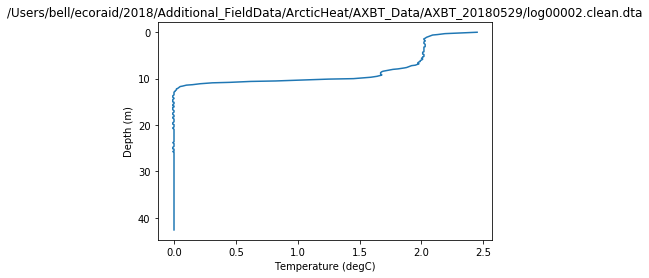

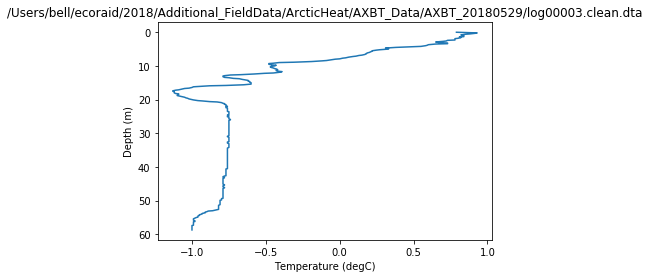

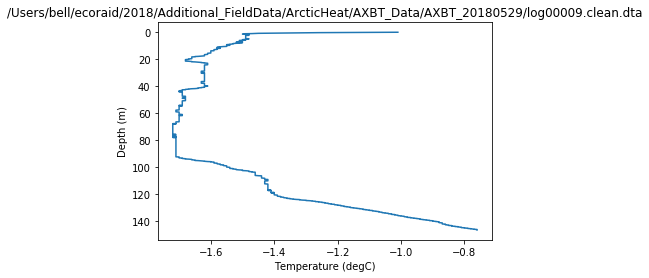

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
for ds, df in dfs.items():
    fig = plt.figure()
    try:
        plt.plot(df['(C)'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
        ax = plt.gca()
        ax.invert_yaxis()
        plt.title(ds)
    except:
        pass
    


### AXCTD

Will have failed above in plots but will likely have been read in.

Also, erroneous values of T and S are dynamically skipped but still in data file

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWar

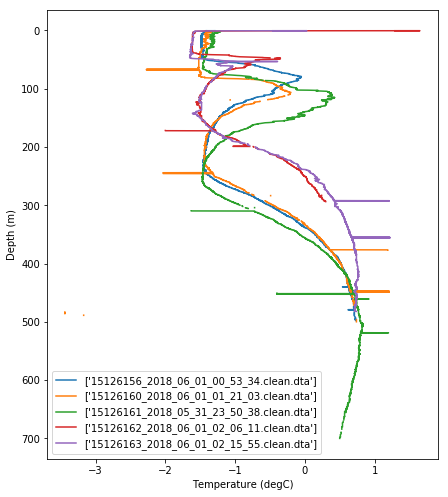

In [71]:
fig, ax = plt.subplots(figsize=(7,8.25))
for ds, df in dfs.items():

    try:
        df['Temp'][df['Salinity'] < 20] = np.nan
        df['Temp'][df['Salinity'] > 37] = np.nan
        df['Salinity'][df['Salinity'] < 20] = np.nan
        df['Salinity'][df['Salinity'] > 37] = np.nan
        
        df['Temp'][df['Temp'] > 20] = np.nan
        df['Salinity'][df['Temp'] > 20] = np.nan
    except:
        continue
    try:
        ax.plot(df['Temp'],df['Depth'], label=ds.split('/')[-1:])
    except:
        pass
    
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (degC)')    
ax.invert_yaxis()
plt.legend(loc='best')

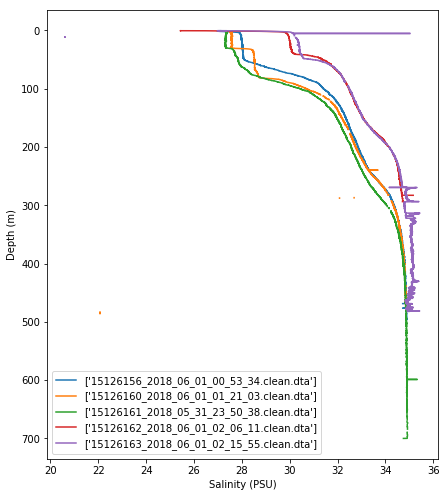

In [72]:
fig, ax = plt.subplots(figsize=(7,8.25))
for ds, df in dfs.items():
    try:
        ax.plot(df['Salinity'],df['Depth'], label=ds.split('/')[-1:])
    except:
        pass
    
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (PSU)')    
ax.invert_yaxis()
plt.legend(loc='best')

15126156_2018_06_01_00_53_34.clean.dta
15126160_2018_06_01_01_21_03.clean.dta
15126161_2018_05_31_23_50_38.clean.dta
15126162_2018_06_01_02_06_11.clean.dta
15126163_2018_06_01_02_15_55.clean.dta


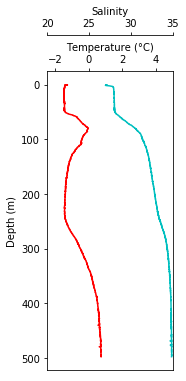

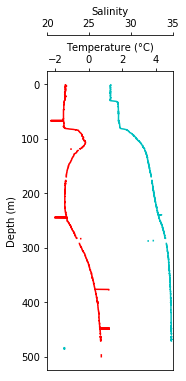

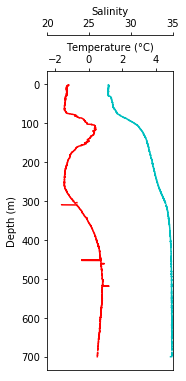

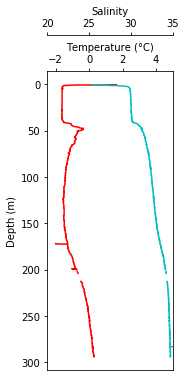

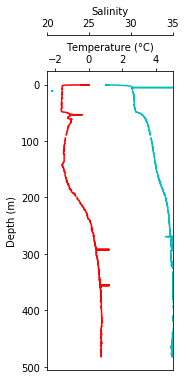

In [73]:
### Alternatively, if we want the axis label on the same side (bottom or top)
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

for ds, df in dfs.items():
    try:
        df['Temp'] # fail out if key is non existent
        print(ds.split('/')[-1])
        fig, ax = plt.subplots(figsize=(2.25,5.5))
        cs = ax.plot(df['Temp'],df['Depth'],'r')
        ax3 = ax.twiny()
        ax3.spines["top"].set_position(("axes", 1.12))
        make_patch_spines_invisible(ax3)
        ax3.spines["top"].set_visible(True)
        cs = ax3.plot(df['Salinity'],df['Depth'],'c')

        ax.set_xlim([-2.5,5])
        ax3.set_xlim([20,35])

        plt.gca().invert_yaxis()

        ax.xaxis.set_label_position("top")
        ax.xaxis.set_ticks_position("top")
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel('Temperature (°C)') 
        ax3.set_xlabel('Salinity') 
        
    except KeyError:
        pass
    
